In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


1. tf.keras.datasets API를 이용하여 MNIST dataset을 load해보자. 

In [ ]:
nb_classes = 10
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

2. Softmax classifier를 구현해보고 train/test 해보자. learning rate 0.1, epoch = 15
3. MNIST dataset에서 image 한 개를 불러내어, softmax classifier로 prediction을 진행해보자.

In [ ]:
#Implement softmax classifier here
x = tf.placeholder(tf.float32, shape=[None, 28, 28])
y = tf.placeholder(tf.int32, shape=[None,])

X = tf.reshape(x, [-1, 28 * 28])
Y_one_hot = tf.one_hot(y, 10)  # one hot
print("reshape one_hot:", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, 10])
print("reshape one_hot:", Y_one_hot)

W = tf.Variable(tf.random_normal([28 * 28 * 1, 10]))
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(X, W) + b
hypo = tf.nn.softmax(logits)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_one_hot, logits=logits))
train = tf.train.GradientDescentOptimizer(1e-1).minimize(cost)

prediction = tf.argmax(hypo, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
import random
import matplotlib.pyplot as plt
def train_and_test():
  batch_size = 100
  train_steps_in_epoch = X_train.shape[0] // batch_size
  log_interval = 100
  max_epoch = 25

  with tf.Session() as sess:
      #Implement train & test logic here
      sess.run(tf.global_variables_initializer())
      for epoch in range(max_epoch):
          for i in range(train_steps_in_epoch):
              start = i*batch_size
              end = (i+1)*batch_size
              batch_x, batch_y = X_train[start:end], y_train[start:end]
              _, cost_val = sess.run([train, cost], feed_dict={x: batch_x, y: batch_y})
              if i % log_interval == 0:
                  print("steps: %d, loss: %f" % (i, cost_val))

          test_accuracy = sess.run(accuracy, feed_dict={x: X_test, y: y_test})
          print("%d epoch's Test accuracy: %f" % (epoch+1, test_accuracy))
      
      #implement random image test
      r = random.randint(0, len(X_test) - 1)
      print("Label: ", y_test[r])
      print(X_test[r:r+1].shape)
      print(
          "Prediction: ",
          sess.run(tf.argmax(hypo, 1), feed_dict={x: X_test[r:r+1]}),
      )

      plt.imshow(
          X_test[r:r+1].reshape(28, 28),
          cmap="Greys",
          interpolation="nearest",
      )
      plt.show()
# train_and_test()

4. 수업시간에 배운 min_max_scaler를 이용해 주어진 데이터를 normalize 한 다음에 train / test해보자. 제약조건은 동일하다. 3.과 비교해보자.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape, y_train.shape)

#Implement min_max_scaler here
train_max = X_train.max()
train_min = X_train.min()
print(train_max, train_min)

def min_max_scaler(data, data_min, data_max):
    numerator = data - data_min
    denominator = data_max - data_min
    return numerator / (denominator + 1e-7)

X_train = min_max_scaler(X_train, train_min, train_max)
X_test = min_max_scaler(X_test, train_min, train_max)

train_and_test()

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape, y_train.shape)

train_mean = X_train.mean()
train_std = X_train.std()
print(train_mean, train_std)

def normalize(data, mean, std):
    return (data - mean) / std

X_train = normalize(X_train, train_mean, train_std)
X_test = normalize(X_test, train_mean, train_std)

print(X_train.mean(), X_train.std())

train_and_test()

5. L2 regularization을 구현해서 적용해보자

In [ ]:
#Implement softmax classifier here
x = tf.placeholder(tf.float32, shape=[None, 28, 28])
y = tf.placeholder(tf.int32, shape=[None,])

X = tf.reshape(x, [-1, 28 * 28])
Y_one_hot = tf.one_hot(y, 10)  # one hot
print("reshape one_hot:", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, 10])
print("reshape one_hot:", Y_one_hot)

W = tf.Variable(tf.random_normal([28 * 28 * 1, 10]))
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(X, W) + b
hypo = tf.nn.softmax(logits)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_one_hot, logits=logits))
beta = 1e-5
# cost = cost + beta * tf.reduce_sum(W * W) / 2
cost = cost + beta * tf.nn.l2_loss(W)

train = tf.train.GradientDescentOptimizer(1e-1).minimize(cost)

prediction = tf.argmax(hypo, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

import random
import matplotlib.pyplot as plt
def train_and_test():
  batch_size = 100
  train_steps_in_epoch = X_train.shape[0] // batch_size
  log_interval = 100
  max_epoch = 25

  with tf.Session() as sess:
      #Implement train & test logic here
      sess.run(tf.global_variables_initializer())
      for epoch in range(max_epoch):
          for i in range(train_steps_in_epoch):
              start = i*batch_size
              end = (i+1)*batch_size
              batch_x, batch_y = X_train[start:end], y_train[start:end]
              _, cost_val = sess.run([train, cost], feed_dict={x: batch_x, y: batch_y})
              if i % log_interval == 0:
                  print("steps: %d, loss: %f" % (i, cost_val))

          test_accuracy = sess.run(accuracy, feed_dict={x: X_test, y: y_test})
          print("%d epoch's Test accuracy: %f" % (epoch+1, test_accuracy))
      
      #implement random image test
      r = random.randint(0, len(X_test) - 1)
      print("Label: ", y_test[r])
      print(X_test[r:r+1].shape)
      print(
          "Prediction: ",
          sess.run(tf.argmax(hypo, 1), feed_dict={x: X_test[r:r+1]}),
      )

      plt.imshow(
          X_test[r:r+1].reshape(28, 28),
          cmap="Greys",
          interpolation="nearest",
      )
      plt.show()
train_and_test()

6. MNIST dataset 대신 CIFAR10 dataset을 이용하여,
softmax classifier를 작성해보자. 제약조건은 이전과 동일하다.
image 한 개를 불러내어, softmax classifier로 prediction을 진행해보자.


(50000, 32, 32, 3) (50000, 1)
[125.30691805 122.95039414 113.86538318] [62.99321928 62.08870764 66.70489964]
-1.98921279913639 2.1267894095169213 5.2147915615326686e-17 0.9999999999999961
reshape one_hot: Tensor("one_hot_5:0", shape=(?, 1, 10), dtype=float32)
reshape one_hot: Tensor("Reshape_11:0", shape=(?, 10), dtype=float32)
steps: 0, loss: 71.200600
steps: 100, loss: 27.072315
steps: 200, loss: 26.672487
steps: 300, loss: 21.752735
steps: 400, loss: 16.104349
1 epoch's Test accuracy: 0.254800
steps: 0, loss: 17.027208
steps: 100, loss: 14.554087
steps: 200, loss: 19.363270
steps: 300, loss: 15.225926
steps: 400, loss: 12.478217
2 epoch's Test accuracy: 0.257500
steps: 0, loss: 12.642439
steps: 100, loss: 11.258831
steps: 200, loss: 15.839004
steps: 300, loss: 12.725488
steps: 400, loss: 10.336375
3 epoch's Test accuracy: 0.248800
steps: 0, loss: 10.710883
steps: 100, loss: 9.656334
steps: 200, loss: 12.697236
steps: 300, loss: 11.320501
steps: 400, loss: 8.900318
4 epoch's Test acc

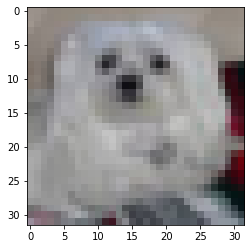

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data
(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape, y_train.shape)

train_mean = X_train.mean(axis=(0,1,2))
train_std = X_train.std(axis=(0,1,2))
print(train_mean, train_std)

def normalize(data, mean, std):
    return (data - mean) / std

orig_X_test = X_test
X_train = normalize(X_train, train_mean, train_std)
X_test = normalize(X_test, train_mean, train_std)

print(X_train.min(), X_train.max(), X_train.mean(), X_train.std())

#Implement softmax classifier here
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
y = tf.placeholder(tf.int32, shape=[None, 1])

X = tf.reshape(x, [-1, 32 * 32 * 3])
Y_one_hot = tf.one_hot(y, 10)  # one hot
print("reshape one_hot:", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, 10])
print("reshape one_hot:", Y_one_hot)

W = tf.Variable(tf.random_normal([32 * 32 * 3, 10]))
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(X, W) + b
hypo = tf.nn.softmax(logits)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_one_hot, logits=logits))
beta = 1e-5
# cost = cost + beta * tf.reduce_sum(W * W) / 2
cost = cost + beta * tf.nn.l2_loss(W)

train = tf.train.GradientDescentOptimizer(1e-1).minimize(cost)

prediction = tf.argmax(hypo, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

import random
import matplotlib.pyplot as plt
batch_size = 100
train_steps_in_epoch = X_train.shape[0] // batch_size
log_interval = 100
max_epoch = 25

with tf.Session() as sess:
    #Implement train & test logic here
    sess.run(tf.global_variables_initializer())
    for epoch in range(max_epoch):
        for i in range(train_steps_in_epoch):
            start = i*batch_size
            end = (i+1)*batch_size
            batch_x, batch_y = X_train[start:end], y_train[start:end]
            _, cost_val = sess.run([train, cost], feed_dict={x: batch_x, y: batch_y})
            if i % log_interval == 0:
                print("steps: %d, loss: %f" % (i, cost_val))

        test_accuracy = sess.run(accuracy, feed_dict={x: X_test, y: y_test})
        print("%d epoch's Test accuracy: %f" % (epoch+1, test_accuracy))
    
    #implement random image test
    r = random.randint(0, len(orig_X_test) - 1)
    print("Label: ", y_test[r])
    print(orig_X_test[r:r+1].shape)
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypo, 1), feed_dict={x: orig_X_test[r:r+1]}),
    )

    plt.imshow(
        orig_X_test[r:r+1].reshape(32, 32, 3),
        interpolation="nearest",
    )
    plt.show()

7. examples.tutorials.mnist 모듈을 사용하여 4.에서 작성한 코드를 간소화 해보자

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, validation_size=0)
# reshape of X and one_hot of Y and min_max scale is already done here
print(mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.test.images.shape, mnist.test.labels.shape)
print(mnist.train.images.min(), mnist.train.images.max())
print(mnist.train.num_examples)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
0.0 1.0
60000


In [ ]:
#Implement softmax classifier here
X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.int32, shape=[None, 10])

W = tf.Variable(tf.random_normal([28 * 28 * 1, 10]))
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(X, W) + b
hypo = tf.nn.softmax(logits)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits))
beta = 1e-5
# cost = cost + beta * tf.reduce_sum(W * W) / 2
cost = cost + beta * tf.nn.l2_loss(W)

train = tf.train.GradientDescentOptimizer(1e-1).minimize(cost)

prediction = tf.argmax(hypo, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

import random
import matplotlib.pyplot as plt
def train_and_test():
  batch_size = 100
  train_steps_in_epoch = mnist.train.num_examples // batch_size
  log_interval = 100
  max_epoch = 25

  with tf.Session() as sess:
      # train & test
      sess.run(tf.global_variables_initializer())
      for epoch in range(max_epoch):
          for i in range(train_steps_in_epoch):
              batch_xs, batch_ys = mnist.train.next_batch(batch_size)
              # start = i*batch_size
              # end = (i+1)*batch_size
              # batch_xs, batch_ys = X_train[start:end], y_train[start:end]
              _, cost_val = sess.run([train, cost], feed_dict={X: batch_x, Y: batch_y})
              if i % log_interval == 0:
                  print("steps: %d, loss: %f" % (i, cost_val))

          test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
          print("%d epoch's Test accuracy: %f" % (epoch+1, test_accuracy))
train_and_test()